<a href="https://colab.research.google.com/github/AdityaGhatty/Datascience/blob/main/Copy_of_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

No, because an ELPD_Loo value compares a model to another. Without a reference model you can't compare if the eldp_loo value is higher than something else.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when a model is  built to be "too complex" so it picks up on more patterns than what actually exists. It will pick up on all the noise in the model, and perform well on existing data, but not do well on new datasets.

**Task3**:

How do we mitigate overfitting?

To mitigate overfitting  we select models  with the least number of  variables, as well as use "weakly informative" priors to make sure  the model can still fit new datasets. We also use  causal diagrams to visualize the relationships between variables, to seperate causal effects from random correlations to focus only on meaningful predictors.

**Task4**:

How do we mitigate underfitting?

We mitigate underfitting by comparing models  and selecting them based  on edp_loo values to ensure that they are accurate.  Causal diagrams  make sure critical variables are included, to avoid over-simplicity or missed relationships.


**Task5**:

Why would we want more than one predictor in a model?

We would want more that one predictor in a model when multiple predictors together explain the variation in the outcome better than just one, accounting for complexity. This could be because of effects that  relate to the outcome independently or avoiding bias from excluded relevant variables.

**Task6**:

Can we have too many predictors? How would we now?

Yes, we can have too many predictors, which can cause problems like overfitting and inefficiency. We would know based on signs of overfitting and lower elpd_loo values. Causal diagrams  show which predictors to include.

**Task7**:

What is variable selection, and how does it work?

Variable selection is when we determine the number of predictors required  and their effectiveness, to balance between complexity and predictive performance. The process starts with running models with different combinations of  predictors and comparing their performance to identify the lowest eldp_loo values, doing a "reasonableness check"  to make sure the best performing models make sense  in context, creating a causal DAG to visualize the causal relationship between variables, and then using these results and model comparison to refine the variable selection process to ensure the model both fits the  data  and aligns with relationships between variables.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

Standard Model - less flexibility than the Heirarchical and interactive models, simpler interpretability. Each variable affects the prediction independently and assumes that the relation between predictor/response is the same.

Heirarchical Model - more flexibility than standard, allows flexibility with categories to have different relations by allowing for intercept and slope vary with different categories. Each category is treated seperately with its own parameters.

Third Model - models dependencies  between predictors, allows for predictor/response to change depending on category of categorical variable for more complex intepretability than other two models.



**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

The most effective way to visualize multiple linear regression models is to visualize variables in groups of 2-3 while keeping the rest of the variables constant. They cannot be visualized all at once as they are too complex.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with free throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [37]:
import pandas as pd
import pymc as pm
import arviz as az
!pip install bambi
import bambi as bmb

  Using cached bambi-0.15.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached formulae-0.5.4-py3-none-any.whl.metadata (4.5 kB)
Using cached bambi-0.15.0-py3-none-any.whl (109 kB)
Using cached formulae-0.5.4-py3-none-any.whl (53 kB)


In [38]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [39]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

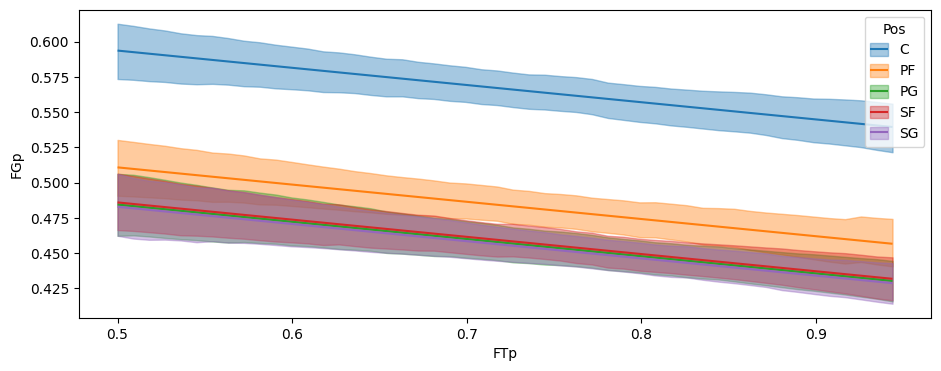

In [44]:
model1 = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb)
#fit the model
idata_basketball = model1.fit(idata_kwargs={'log_likelihood': True})
bmb.interpret.plot_predictions(model1,
                               idata_basketball,
                                ["FTp",  "Pos"], fig_kwargs={"figsize":(11, 4)})

Output()

Output()

ERROR:pymc.stats.convergence:There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

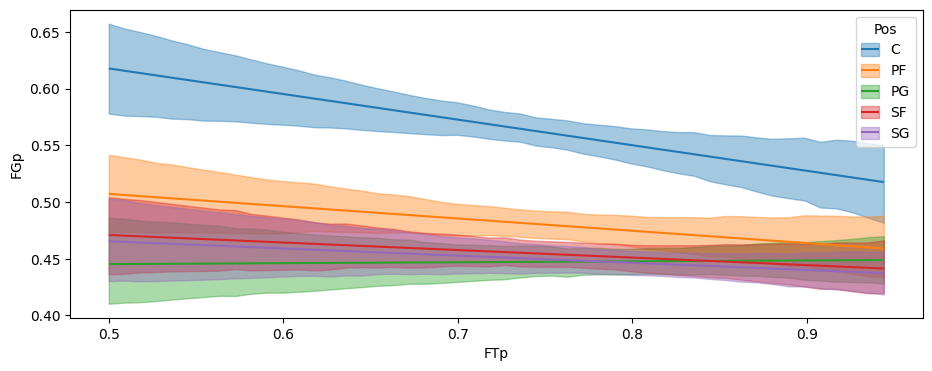

In [46]:
#define the model, but as a hierarchy
model2 = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb)
#create the model
idata_basketball_h = model2.fit(idata_kwargs={'log_likelihood': True})
bmb.interpret.plot_predictions(model2,
                               idata_basketball_h,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

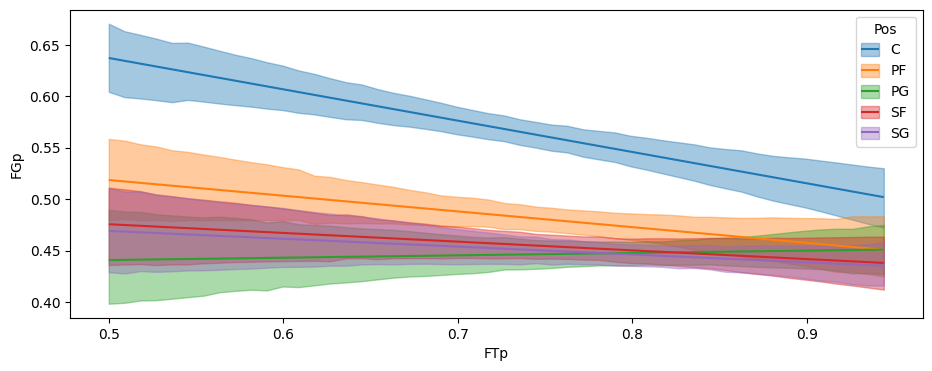

In [47]:
#define the model; bb_inter stands for baskeball interaction
model_bb_inter = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb)
#create the model
idata_bb_inter = model_bb_inter.fit(idata_kwargs={'log_likelihood': True})
bmb.interpret.plot_predictions(model_bb_inter,
                               idata_bb_inter,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x1300 with 6 Axes>,
 array([[<Axes: title={'center': 'Pos = C'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PG'}, xlabel='FTp', ylabel='FGp'>],
        [<Axes: title={'center': 'Pos = SF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = SG'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: xlabel='FTp', ylabel='FGp'>]], dtype=object))

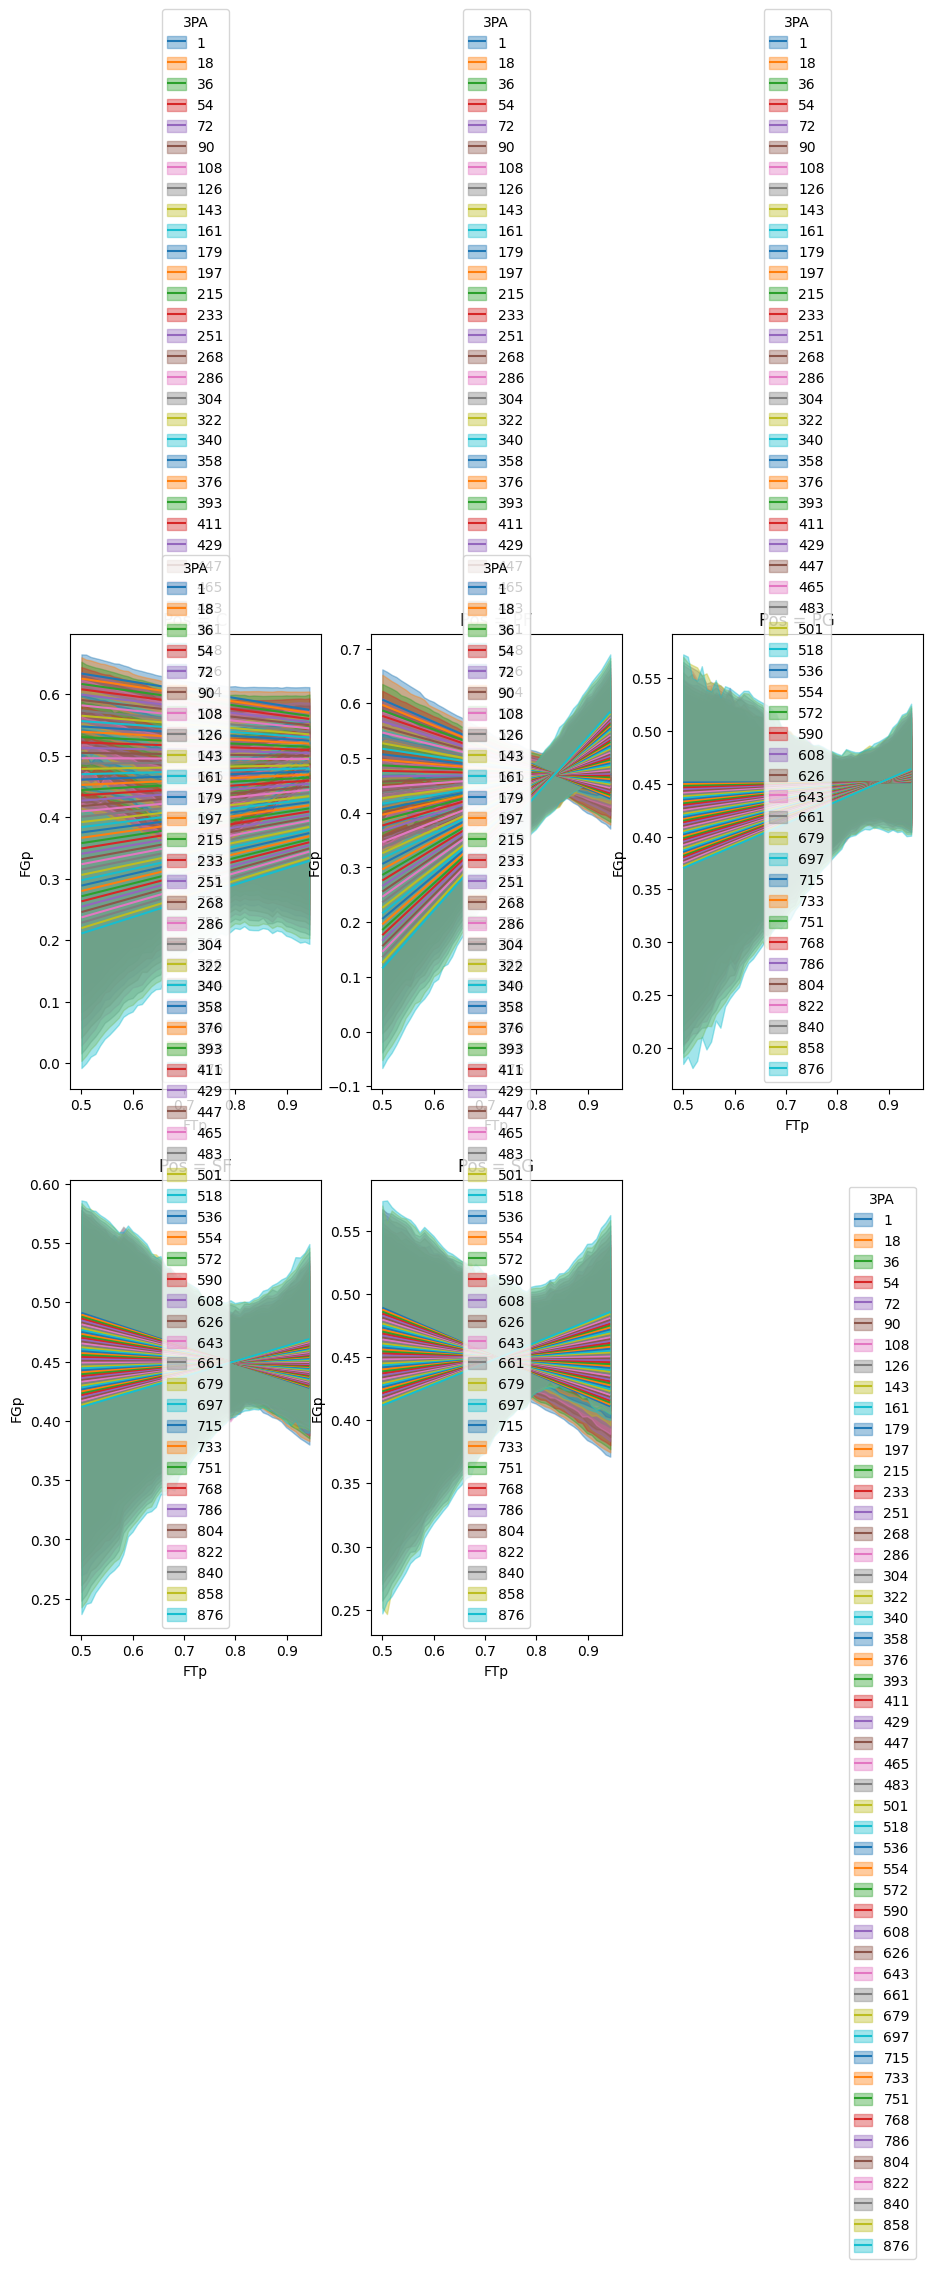

In [65]:
#define the model; bb_interq stands for baskeball interaction quantiative
model_bb_interq = bmb.Model("FGp ~ FTp + Pos + '3PA' + FTp:Pos + FTp:'3PA' + Pos:'3PA' + FTp:Pos:'3PA'", data=bb)
#create the model
idata_bb_interq = model_bb_interq.fit(idata_kwargs={'log_likelihood': True})
bmb.interpret.plot_predictions(model_bb_interq,
                               idata_bb_interq,
                               ["FTp","3PA", "Pos"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x1300 with 6 Axes>,
 array([[<Axes: title={'center': 'Pos = C'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PG'}, xlabel='FTp', ylabel='FGp'>],
        [<Axes: title={'center': 'Pos = SF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = SG'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: xlabel='FTp', ylabel='FGp'>]], dtype=object))

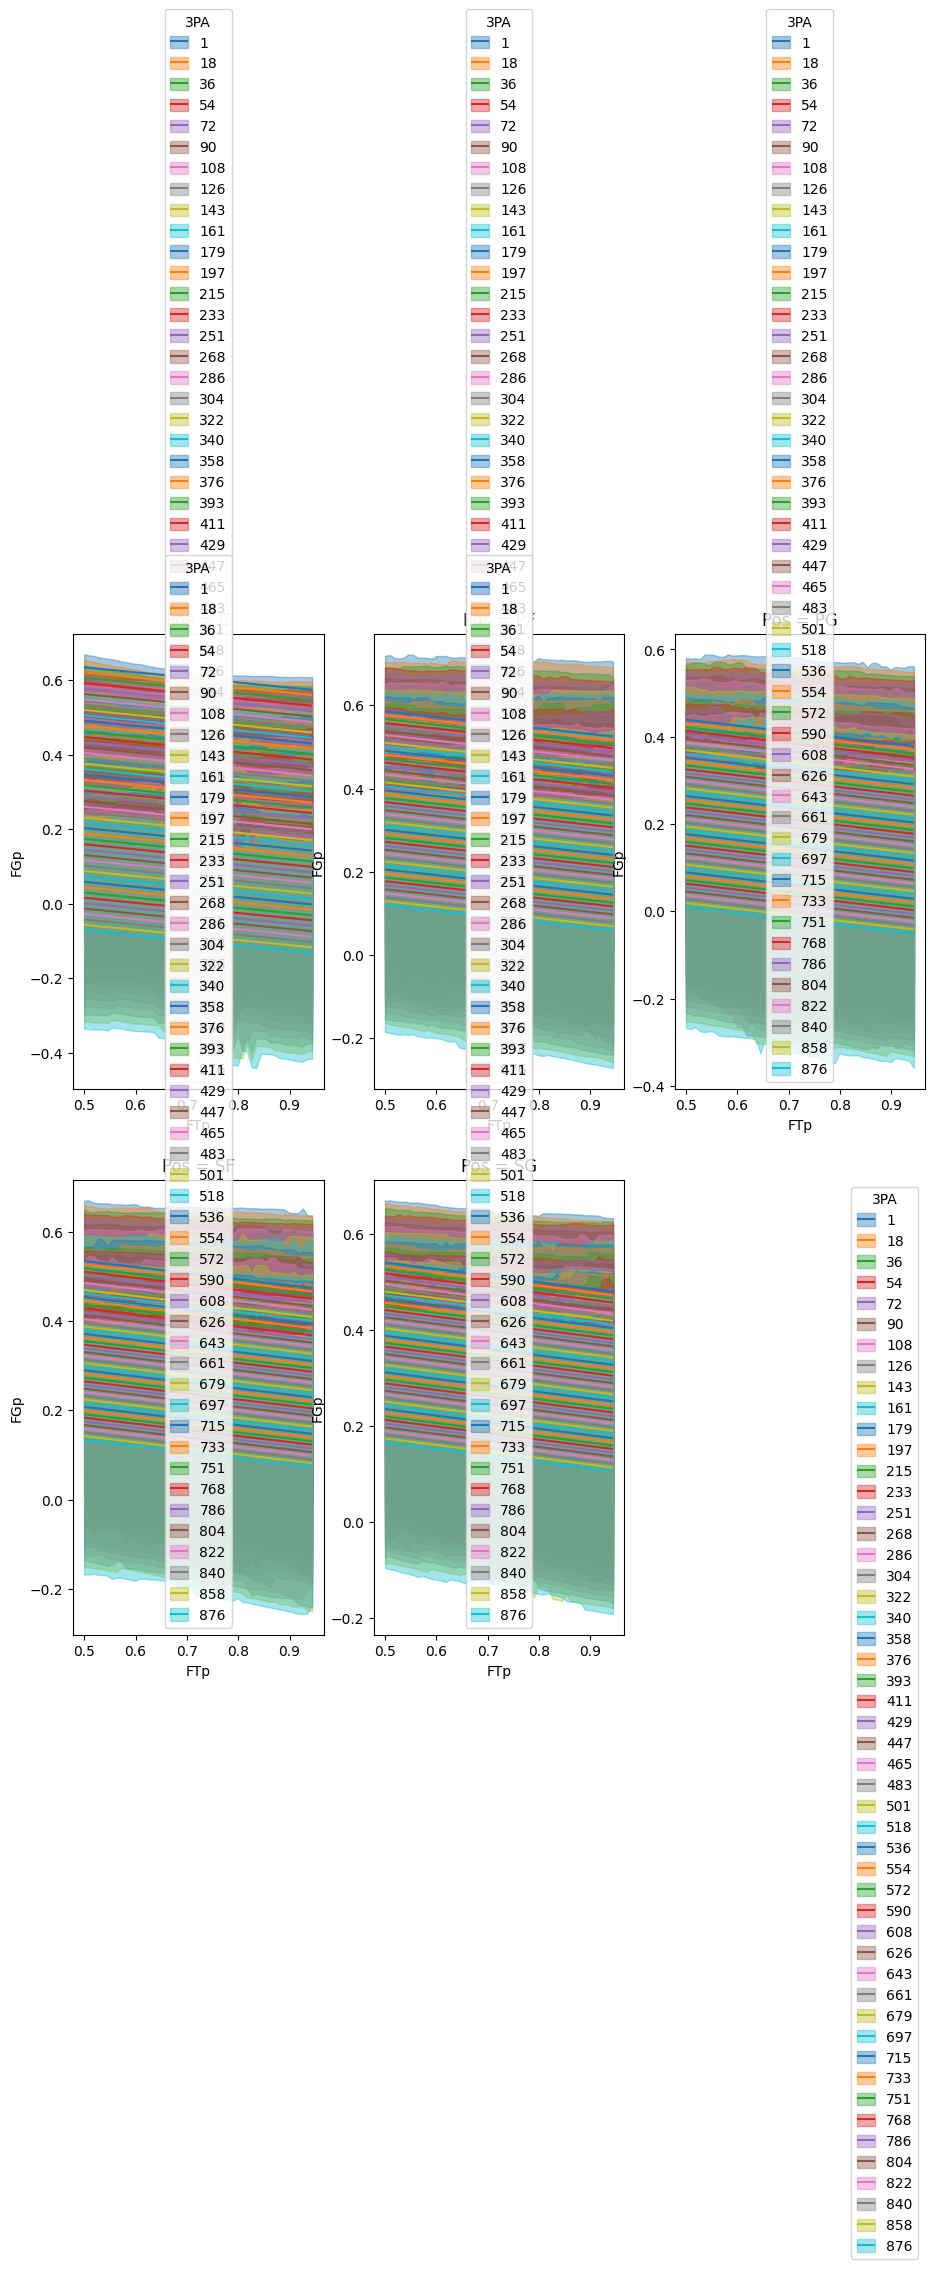

In [64]:
#define the model; bb_interq stands for baskeball interaction quantiative
model_bb_interq1 = bmb.Model("FGp ~ FTp + Pos + '3PA' + Pos:'3PA'", data=bb)
#create the model
idata_bb_interq1 = model_bb_interq.fit(idata_kwargs={'log_likelihood': True})
bmb.interpret.plot_predictions(model_bb_interq1,
                               idata_bb_interq1,
                               ["FTp","3PA", "Pos"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

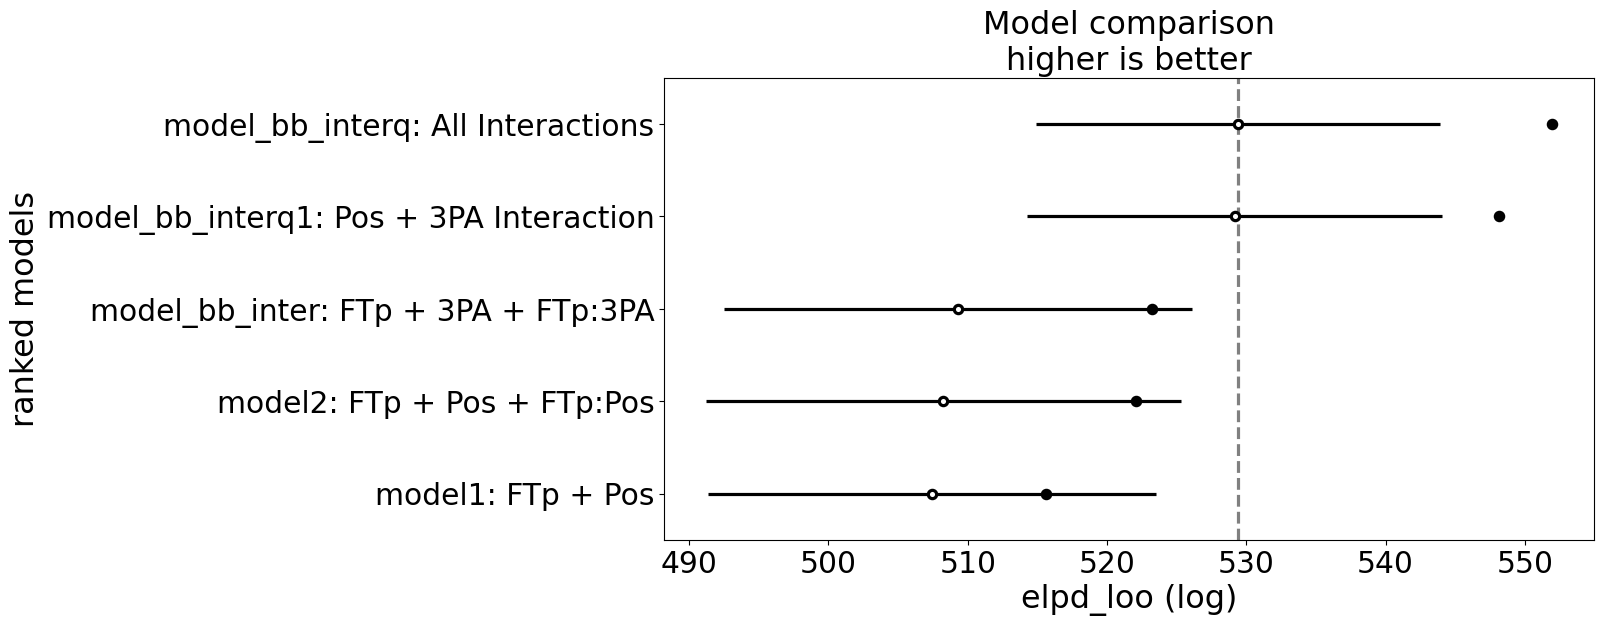

In [68]:
idata_dict = {
    "model1: FTp + Pos": idata_basketball,
    "model2: FTp + Pos + FTp:Pos": idata_basketball_h,
    "model_bb_inter: FTp + 3PA + FTp:3PA": idata_bb_inter,
    "model_bb_interq: All Interactions": idata_bb_interq,
    "model_bb_interq1: Pos + 3PA Interaction": idata_bb_interq1
}
comparison = az.compare(idata_dict)
az.plot_compare(comparison, figsize=(12, 6), insample_dev=True)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

The model with interactions between all variables is better than the rest according to this metric. I think this is because it captures more complex relationships and dependencies in the data.
